<a href="https://colab.research.google.com/github/MPT-Quant/research/blob/master/WQU_Machine_LearningM7_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project M7 Submission 3

Name: Man Sing Ho, Sergey Chigrinov, Aditya Prasann, Jung Won Kim

Date: Jan.07.2020

Note : Heavey use of the work done in Github BlackArbsCEO/Adv_Fin_ML_Exercises. Please refer to following link : https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/blob/master/notebooks/Tick%2C%20Volume%2C%20Dollar%20Volume%20Bars.ipynb
Also, Github Jackal08/financial-data-structures and please refer to the link : https://github.com/Jackal08/financial-data-structures



---

In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/WQU/'

total 290782
-rw------- 1 root root     35137 Sep 25 23:58 'Computational Finance M2 Peer Review.ipynb'
-rw------- 1 root root     82662 Nov 21 01:14  dollar_bars.csv
-rw------- 1 root root 295084084 Nov 20 11:12  ES_Trades.csv
-rw------- 1 root root     75109 Sep 15 07:00  GWP_PTAP_Data.xlsx
-rw------- 1 root root     71344 Sep 15 07:09 'GWP_PTAP_Data.xlsx의 사본'
drwx------ 2 root root      4096 Nov 24 12:06 'M2 Peer Review Assignment'
drwx------ 2 root root      4096 Nov 24 12:07 'M4 Peer Review Assignment'
-rw------- 1 root root     22964 Sep 24 02:06  M4_v2.ipynb
drwx------ 2 root root      4096 Nov 26 02:14 'M5 ML Notebooks (updated)'
drwx------ 2 root root      4096 Dec  9 05:30 'M6 ML Notebooks'
-rw------- 1 root root      2540 Dec 28 09:23  meta_label_data.csv
-rw------- 1 root root     74524 Dec 28 06:44  plot_temp.csv
-rw------- 1 root root    182066 Dec 28 04:51  tick_bars_.csv
-rw------- 1 root root     88086 Nov 21 01:14  tick_bars.csv
-rw------- 1 root root      3197 Nov 21

In [0]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime
from math import ceil
import cython
from tqdm import tqdm
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#import zipline
import warnings
!pip install pyfolio
import pyfolio as pf
from sklearn.metrics import roc_curve, classification_report
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
!pip install git+git://github.com/Jackal08/financial-data-structures
import cython_loops
sns.set_style("whitegrid")
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/WQU/')
file_path = '/content/gdrive/My Drive/Colab Notebooks/WQU/'

     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=86a579a408c0ebd503095a40764fafdd577da795a5497dcc1a954a73047d50b9
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37089 sha256=68087fd52adeb3903d7281bf52ddcc1b2167b9d33d9acc5ff949e2f667ee756e
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 501kB 52.8MB/s 
     |████████████████████████████████| 4.3MB 48.4MB/s 
  Cloning git://github.com/Jackal08/financial-data-structures to /tmp/pip-req-build-f8r825n_
  Running command git clone -q git://github.com/Jackal08/financial-data-structures /tmp/pip-req-build-f8r825n_
  Created wheel for UNKNOWN: filename=UNKNOWN-0.0.0-cp36-cp36m-linux_x86_64.whl size=46809 sha256=0a43bd284bb20049a508516b386eb36454ad0f513dbf833c17bfd271b8580b94
  Stored in directory: /tmp/pip-ephem-wheel-cache-rgk8bh8r/wheels/2a/61/0a/ee2c5ba32b10852781cf45025f92ddd8f7193c41f82e798014
Successfully built UNKNOWN


In [0]:
df = pd.read_csv(file_path+'ES_Trades.csv')
df.head()

,Symbol,Date,Time,Price,Volume,Market Flag,Sales Condition,Exclude Record Flag,Unfiltered Price
0,ESU13,09/01/2013,17:00:00.083,1640.25,8,E,0,NaN,1640.25
1,ESU13,09/01/2013,17:00:00.083,1640.25,1,E,0,NaN,1640.25
2,ESU13,09/01/2013,17:00:00.083,1640.25,2,E,0,NaN,1640.25
3,ESU13,09/01/2013,17:00:00.083,1640.25,1,E,0,NaN,1640.25
4,ESU13,09/01/2013,17:00:00.083,1640.25,1,E,0,NaN,1640.25


##M5 Part

Based on the experiment done in M3 Submission 1, we used tick bars since they have lowest standard deviations, lowest autocorrelation, and closest to normal distribution

In [0]:
tick_bars = pd.read_csv(file_path+'tick_bars_.csv') 

data = tick_bars.copy(deep=True)
data = data.set_index('date')
data.head()

,open,high,low,close,volume,vwap
date,,,,,,
09/01/2013 17:01:00.874,1640.25,1641.0,1639.00,1640.00,3975.0,1639.985220
09/01/2013 17:09:03.736,1640.00,1641.0,1639.50,1640.50,3169.0,1640.205743
09/01/2013 17:18:34.758,1640.50,1642.0,1639.50,1640.75,4729.0,1640.624604
09/01/2013 17:34:21.821,1640.50,1642.0,1639.75,1641.75,3837.0,1640.692012
09/01/2013 17:57:25.983,1641.75,1642.0,1640.50,1641.75,3859.0,1641.500000


In [0]:
#Remove Weekends
weekend = ['09/01/2013', '09/07/2013', '09/08/2013', '09/14/2013', '09/15/2013', '09/21/2013', '09/22/2013']
new_index = []

for dt in data.index:
  if dt[:10] in weekend:
    continue
  else:
    new_index.append(dt)

data = data.loc[new_index]
data.head()

,open,high,low,close,volume,vwap
date,,,,,,
09/02/2013 00:38:58.386,1643.00,1643.50,1642.25,1642.75,2196.0,1642.792691
09/02/2013 01:02:21.907,1642.75,1643.50,1642.00,1643.50,2817.0,1642.775382
09/02/2013 01:19:59.872,1643.50,1644.00,1643.00,1643.25,2281.0,1643.509974
09/02/2013 01:31:47.368,1643.25,1644.50,1643.00,1644.00,2462.0,1643.791531
09/02/2013 01:57:42.588,1644.00,1644.25,1642.25,1642.50,2034.0,1643.329769


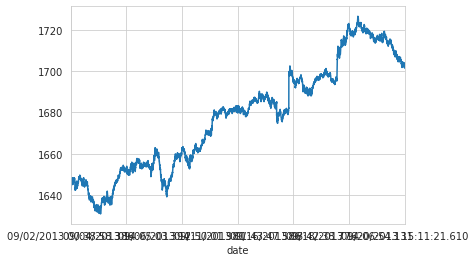

In [0]:
data['close'].plot()

Technical Features

In [0]:
def willr(close, look_back=20):
  highest_high = close.rolling(look_back).max()
  lowest_low = close.rolling(look_back).min()
  r = -100*((highest_high-close)/(highest_high-lowest_low))
  return r

def ichimoku(high, low, close):
  kenkansen = ((high.rolling(9).max() + low.rolling(9).min()) / 2)
  kijunsen = ((high.rolling(26).max() + low.rolling(26).min()) / 2)
  leading_span_a = ((kenkansen + kijunsen) / 2).shift(26)
  leading_span_b = ((high.rolling(52).max() + low.rolling(52).min()) / 2).shift(26)
  lagging_span = close.shift(-26)
  return kenkansen, kijunsen, leading_span_a, leading_span_b, lagging_span

def relative_return(open, high, low, close):
  h_o = high/open-1
  l_o = low/open-1
  c_o = close/open-1
  return h_o, l_o, c_o

def money_flow_index(high, low, close, volume, look_back=14):
  '''
  def pos_flow(money_flow, typical_price):
      result = money_flow[money_flow > 0].sum()
      return result
  
  def neg_flow(money_flow, typical_price):
      result = money_flow[money_flow < 0].sum()
      return result
  '''
  typical_price = (high + low + close) / 3
  money_flow = typical_price * volume
  typical_price = typical_price - close.shift(1)
  pos_mf = money_flow.copy()
  pos_mf[typical_price > 0] = money_flow[typical_price > 0].rolling(look_back).sum()
  neg_mf = money_flow.copy()
  neg_mf[typical_price < 0] = money_flow[typical_price < 0].rolling(look_back).sum()
  return 100 * (pos_mf / (pos_mf + neg_mf))

def rsi(close, look_back=21):
  ups = pd.Series(0, index=close.index)
  downs = pd.Series(0, index=close.index)
  delta = close - close.shift(1)
  ups[delta > 0] = delta
  downs[delta < 0] = -delta
  ups.fillna(0, inplace=True)
  downs.fillna(0, inplace=True)
  rs = ups.rolling(look_back).mean() / downs.rolling(look_back).mean()
  return 100 - (100 / (1 + rs))

def stochastic(close, high, low, look_back = 5):
  k_ = 100 * (close - low.rolling(look_back).min()) / (high.rolling(look_back).max() - low.rolling(look_back).min())
  d_ = k_.rolling(look_back-2).mean()
  d_slow = d_.rolling(look_back-2).mean()
  return k_, d_, d_slow

def trend(close):
  trend_4 = close/close.shift(4)-1
  trend_8 = close/close.shift(8)-1
  trend_16 = close/close.shift(16)-1
  trend_32 = close/close.shift(32)-1
  return trend_4, trend_8, trend_16, trend_32


In [0]:
m = len(data)
n = 18
df_temp = pd.DataFrame(np.zeros((m, n)))

open = data['open']
close = data['close']
high = data['high']
low = data['low']
volume = data['volume']

william_r = willr(close, look_back=20)
kenkansen, kijunsen, leading_span_a, leading_span_b, lagging_span = ichimoku(high, low, close)
h_o, l_o, c_o = relative_return(open, high, low, close)
money_flow = money_flow_index(high, low, close, volume, look_back=14)
rsi = rsi(close, look_back=21)
k, d, d_slow = stochastic(close, high, low, look_back = 5)
trend_4, trend_8, trend_16, trend_32 = trend(close)

df_temp[0]  = william_r.values
df_temp[1]  = kenkansen.values
df_temp[2]  = kijunsen.values
df_temp[3]  = leading_span_a.values
df_temp[4]  = leading_span_b.values
df_temp[5]  = lagging_span.values
df_temp[6]  = h_o.values
df_temp[7]  = l_o.values
df_temp[8]  = c_o.values
df_temp[9]  = money_flow.values
df_temp[10]  = rsi.values
df_temp[11]  = k.values
df_temp[12]  = d.values
df_temp[13]  = d_slow.values
df_temp[14]  = trend_4.values
df_temp[15]  = trend_8.values
df_temp[16]  = trend_16.values
df_temp[17]  = trend_32.values

df = df_temp.rename(columns = {0:'william_r', 1:'kenkansen', 2:'kijunsen', 3:'leading_span_a', 4:'leading_span_b', 5:'lagging_span', 6:'h_o', 7:'l_o', 8:'c_o', 9:'money_flow', 10:'rsi', 11:'stochastic_k', 12:'stochastic_d', 13:'stochastic_d_slow', 14:'trend_4', 15:'trend_8', 16:'trend_16', 17:'trend_32' })
df = df.set_index(data.index)

In [0]:
df.head()

,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32
date,,,,,,,,,,,,,,,,,,
09/02/2013 00:38:58.386,NaN,NaN,NaN,NaN,NaN,1646.75,0.000304,-0.000456,-0.000152,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/02/2013 01:02:21.907,NaN,NaN,NaN,NaN,NaN,1646.75,0.000457,-0.000457,0.000457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/02/2013 01:19:59.872,NaN,NaN,NaN,NaN,NaN,1647.25,0.000304,-0.000304,-0.000152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/02/2013 01:31:47.368,NaN,NaN,NaN,NaN,NaN,1647.50,0.000761,-0.000152,0.000456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/02/2013 01:57:42.588,NaN,NaN,NaN,NaN,NaN,1648.50,0.000152,-0.001064,-0.000912,NaN,NaN,20.0,NaN,NaN,-0.000152,NaN,NaN,NaN


In [0]:
df = df.dropna(axis=0)
df.head()

,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32
date,,,,,,,,,,,,,,,,,,
09/03/2013 03:37:26.554,-87.5,1647.500,1647.500,1646.875,1645.250,1645.25,0.000152,-0.000304,-0.000152,6.050302,43.589744,12.500000,34.722222,45.833333,-0.000910,-0.000758,-0.001062,0.000000
09/03/2013 03:45:14.698,-75.0,1647.500,1647.500,1646.875,1645.250,1644.50,0.000607,0.000000,0.000152,93.490896,47.368421,25.000000,20.833333,32.407407,-0.000303,-0.000455,-0.000455,-0.000303
09/03/2013 03:52:56.071,-87.5,1647.500,1647.625,1646.875,1645.375,1644.50,0.000304,-0.000304,-0.000152,7.085897,44.736842,12.500000,16.666667,24.074074,-0.000758,-0.000455,-0.000455,-0.000304
09/03/2013 03:53:34.920,-100.0,1646.875,1647.125,1646.875,1645.375,1643.25,0.000000,-0.000911,-0.000911,7.124616,35.714286,0.000000,12.500000,16.666667,-0.001063,-0.001820,-0.000759,-0.000152
09/03/2013 03:54:03.943,-100.0,1646.250,1646.500,1646.875,1645.375,1643.75,0.000152,-0.000760,-0.000608,6.961890,31.111111,6.666667,6.388889,11.851852,-0.001518,-0.002427,-0.001821,-0.000760


In [0]:
df_norm=(df-df.mean())/df.std()
df_norm.head()

,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32
date,,,,,,,,,,,,,,,,,,
09/03/2013 03:37:26.554,-1.107362,-1.176207,-1.173042,-1.188335,-1.242659,-1.277116,-0.435104,-0.398677,-0.533462,-1.094369,-0.539879,-1.217006,-0.616746,-0.215746,-1.488916,-0.911372,-0.925641,-0.102000
09/03/2013 03:45:14.698,-0.760432,-1.176207,-1.173042,-1.188335,-1.242659,-1.306144,2.023908,1.207928,0.507172,1.049677,-0.263908,-0.823549,-1.137597,-0.758190,-0.520518,-0.567490,-0.438721,-0.270918
09/03/2013 03:52:56.071,-1.107362,-1.176207,-1.168211,-1.188335,-1.237836,-1.306144,0.384401,-0.398677,-0.533462,-1.068977,-0.456102,-1.217006,-1.293852,-1.094880,-1.246945,-0.567568,-0.438776,-0.270943
09/03/2013 03:53:34.920,-1.454292,-1.200352,-1.187533,-1.188335,-1.237836,-1.354525,-1.254609,-3.612618,-3.135324,-1.068027,-1.115053,-1.610463,-1.450107,-1.394159,-1.732357,-2.114920,-0.682837,-0.186562
09/03/2013 03:54:03.943,-1.454292,-1.224498,-1.211684,-1.188335,-1.237836,-1.335173,-0.434232,-2.812856,-2.096509,-1.072017,-1.451240,-1.400619,-1.679282,-1.588691,-2.459741,-2.802736,-1.535608,-0.524807


In [0]:
#input data for the model, cannot use whole sample normalization as above
print(len(df))
weekend = ['09/01/2013', '09/07/2013', '09/08/2013', '09/14/2013', '09/15/2013', '09/21/2013', '09/22/2013']
new_index = []

for dt in df.index:
  if dt[:10] in weekend:
    continue
  else:
    new_index.append(dt)

df = df.loc[new_index]
print(len(df))

5904
5904


In [0]:
input_data = pd.merge(df, data['close'], how='inner', left_index=True, right_index=True)
#temp_datetime = [datetime.strptime(x,  '%m/%d/%Y %H:%M:%S.%f') for x in input_data.index.values]
#input_data.index = temp_datetime
input_data.head()

,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32,close
date,,,,,,,,,,,,,,,,,,,
09/03/2013 03:37:26.554,-87.5,1647.500,1647.500,1646.875,1645.250,1645.25,0.000152,-0.000304,-0.000152,6.050302,43.589744,12.500000,34.722222,45.833333,-0.000910,-0.000758,-0.001062,0.000000,1646.75
09/03/2013 03:45:14.698,-75.0,1647.500,1647.500,1646.875,1645.250,1644.50,0.000607,0.000000,0.000152,93.490896,47.368421,25.000000,20.833333,32.407407,-0.000303,-0.000455,-0.000455,-0.000303,1647.00
09/03/2013 03:52:56.071,-87.5,1647.500,1647.625,1646.875,1645.375,1644.50,0.000304,-0.000304,-0.000152,7.085897,44.736842,12.500000,16.666667,24.074074,-0.000758,-0.000455,-0.000455,-0.000304,1646.75
09/03/2013 03:53:34.920,-100.0,1646.875,1647.125,1646.875,1645.375,1643.25,0.000000,-0.000911,-0.000911,7.124616,35.714286,0.000000,12.500000,16.666667,-0.001063,-0.001820,-0.000759,-0.000152,1645.25
09/03/2013 03:54:03.943,-100.0,1646.250,1646.500,1646.875,1645.375,1643.75,0.000152,-0.000760,-0.000608,6.961890,31.111111,6.666667,6.388889,11.851852,-0.001518,-0.002427,-0.001821,-0.000760,1644.25


In [0]:
non_stationary = []

for i in range(len(input_data.columns)):
  result = adfuller(input_data.iloc[:,i].values)
  if result[0] > -3.433:
    non_stationary.append(i)

print('non-stationary columns are :', non_stationary)

non-stationary columns are : [1, 2, 3, 4, 5, 18]


We want to make non-stationary time series stationary using Fractional Difference

In [0]:
#https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/blob/master/src/features/snippets.py

# get weights
def getWeights(d,size):
    # thres>0 drops insignificant weights
    w=[1.]
    for k in range(1,size):
        w_ = -w[-1]/k*(d-k+1)
        w.append(w_)
    w=np.array(w[::-1]).reshape(-1,1)
    return w

def getWeights_FFD(d,thres):
    w,k=[1.],1
    while True:
        w_=-w[-1]/k*(d-k+1)
        if abs(w_)<thres:break
        w.append(w_);k+=1
    return np.array(w[::-1]).reshape(-1,1)

# =======================================================
# expanding window fractional differentiation

def fracDiff(series, d, thres=0.01):
    '''
    Increasing width window, with treatment of NaNs
    Note 1: For thres=1, nothing is skipped
    Note 2: d can be any positive fractional, not necessarily
        bounded between [0,1]
    '''
    #1) Compute weights for the longest series
    w=getWeights(d, series.shape[0])
    #2) Determine initial calcs to be skipped based on weight-loss threshold
    w_=np.cumsum(abs(w))
    w_ /= w_[-1]
    skip = w_[w_>thres].shape[0]
    #3) Apply weights to values
    df={}
    for name in series.columns:
        seriesF, df_=series[[name]].fillna(method='ffill').dropna(), pd.Series()
        for iloc in range(skip, seriesF.shape[0]):
            loc=seriesF.index[iloc]
            if not np.isfinite(series.loc[loc,name]).any():continue # exclude NAs
            try:
                df_.loc[loc]=np.dot(w[-(iloc+1):,:].T, seriesF.loc[:loc])[0,0]
            except:
                continue
        df[name]=df_.copy(deep=True)
    df=pd.concat(df,axis=1)
    return df

# =======================================================
# fixed-width window fractional differentiation
def fracDiff_FFD(series,d,thres=1e-5):
    # Constant width window (new solution)
    w = getWeights_FFD(d,thres)
    width = len(w)-1
    df={}
    for name in series.columns:
        seriesF, df_=series[[name]].fillna(method='ffill').dropna(), pd.Series()
        for iloc1 in range(width,seriesF.shape[0]):
            loc0,loc1=seriesF.index[iloc1-width], seriesF.index[iloc1]
            test_val = series.loc[loc1,name] # must resample if duplicate index
            if isinstance(test_val, (pd.Series, pd.DataFrame)):
                test_val = test_val.resample('1m').mean()
            if not np.isfinite(test_val).any(): continue # exclude NAs
            try:
                df_.loc[loc1]=np.dot(w.T, seriesF.loc[loc0:loc1])[0,0]
            except:
                continue
        df[name]=df_.copy(deep=True)
    df=pd.concat(df,axis=1)
    return df

"""
def fracDiff_FFD(series,d,thres=1e-5):
    '''
    Constant width window (new solution)
    Note 1: thres determines the cut-off weight for the window
    Note 2: d can be any positive fractional, not necessarily
        bounded [0,1].
    '''
    #1) Compute weights for the longest series
    w=getWeights_FFD(d, thres) ## WHERE IS THIS FUNCTION IN THE BOOK
    width=len(w)-1
    #2) Apply weights to values
    df={}
    for name in series.columns:
        seriesF, df_=series[[name]].fillna(method='ffill').dropna(), pd.Series()
        for iloc1 in range(width,seriesF.shape[0]):
            loc0,loc1=seriesF.index[iloc1-width], seriesF.index[iloc1]
            if not np.isfinite(series.loc[loc1,name]): continue # exclude NAs
            df_.loc[loc1]=np.dot(w.T, seriesF.loc[loc0:loc1])[0,0]
        df[name]=df_.copy(deep=True)
    df=pd.concat(df,axis=1)
    return df
"""
# =======================================================
# finding the min. D value that passes ADF test

def adftest(X):
  from statsmodels.tsa.stattools import adfuller
  result = adfuller(X)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

def plotMinFFD(df0, thres=1e-5):
    # pg. 142
    from statsmodels.tsa.stattools import adfuller
    import matplotlib.pyplot as plt

    out=pd.DataFrame(columns=['adfStat','pVal','lags','nObs','95% conf','corr'])
    for d in np.linspace(0,1,11):
        df1=np.log(df0[['close']]).resample('1D').last() # downcast to daily obs
        df2=fracDiff_FFD(df1,d,thres=thres)
        corr=np.corrcoef(df1.loc[df2.index,'close'],df2['close'])[0,1]
        df2=adfuller(df2['close'],maxlag=None,regression='c',autolag=None)
        out.loc[d]=list(df2[:4])+[df2[4]['5%']]+[corr] # with critical value
    f,ax=plt.subplots(figsize=(9,5))
    out[['adfStat','corr']].plot(ax=ax, secondary_y='adfStat')
    plt.axhline(out['95% conf'].mean(),linewidth=1,color='r',linestyle='dotted')
    return out

In [0]:
input_data_stationary = input_data.copy(deep=True)

for c in non_stationary:
  input_data_stationary.iloc[:,c] = fracDiff_FFD(pd.DataFrame(input_data_stationary.iloc[:,c]),0.9,thres=1e-5)

input_data_stationary = input_data_stationary.dropna()
input_data_stationary

,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32,close
date,,,,,,,,,,,,,,,,,,,
09/03/2013 08:55:55.810,-37.500000,2.238810,2.251383,2.291642,2.278495,2.239178,0.000911,0.000000,0.000759,93.822122,48.275862,83.333333,33.333333,21.481481,0.000304,0.000000,-0.000455,-0.000758,3.445364
09/03/2013 08:57:26.044,-25.000000,2.244095,1.755672,2.289450,2.275912,2.245363,0.000303,0.000000,0.000152,94.967898,46.428571,85.714286,56.349206,33.968254,0.000455,0.000152,0.000000,-0.000910,2.591709
09/03/2013 08:58:40.505,-100.000000,2.122186,1.957949,2.224594,2.274041,3.248533,0.000000,-0.001062,-0.001062,6.163892,39.393939,0.000000,56.349206,48.677249,-0.000304,-0.000607,-0.001062,-0.001668,0.570283
09/03/2013 08:59:18.493,-88.888889,2.111784,2.081865,2.216356,2.397596,3.100422,0.000152,-0.000152,0.000152,94.955308,41.176471,22.222222,35.978836,49.559083,0.000000,-0.000607,-0.000759,-0.001365,2.369323
09/03/2013 09:00:11.487,-42.857143,2.231451,2.214820,2.273751,2.408932,2.131648,0.000456,0.000000,0.000456,94.919444,47.222222,55.555556,25.925926,39.417989,-0.000303,0.000000,-0.000152,-0.000910,2.962141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/20/2013 14:58:07.381,-25.000000,2.483558,2.352772,2.274049,2.296081,1.595128,0.000147,-0.000147,0.000000,50.000000,48.000000,66.666667,67.222222,68.518519,0.000147,0.000000,-0.000147,0.000734,2.362214
09/20/2013 14:58:30.187,-57.142857,2.359131,2.343481,2.227282,2.305622,4.020711,0.000147,-0.000293,-0.000293,7.482785,44.444444,0.000000,47.222222,62.037037,-0.000440,-0.000147,-0.000293,0.000294,1.601799
09/20/2013 14:59:00.041,-57.142857,2.224114,2.339682,2.416649,2.311034,2.227725,0.000147,-0.000294,0.000000,9.479650,40.000000,33.333333,33.333333,49.259259,-0.000293,0.000000,0.000441,0.000294,2.272718


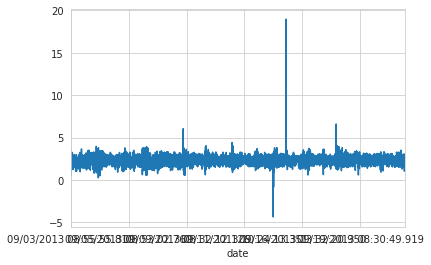

In [0]:
input_data_stationary['close'].plot()

In [0]:
input_data_final = pd.merge(input_data_stationary, input_data['close'], how='inner', left_index=True, right_index=True)
input_data_final = input_data_final.rename(columns={'close_x': 'frac_diff_ret', 'close_y' : 'close'})
input_data_final.to_csv(file_path+'input_data_final.csv')
input_data_final.head()

,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32,frac_diff_ret,close
date,,,,,,,,,,,,,,,,,,,,
09/03/2013 08:55:55.810,-37.500000,2.238810,2.251383,2.291642,2.278495,2.239178,0.000911,0.000000,0.000759,93.822122,48.275862,83.333333,33.333333,21.481481,0.000304,0.000000,-0.000455,-0.000758,3.445364,1647.50
09/03/2013 08:57:26.044,-25.000000,2.244095,1.755672,2.289450,2.275912,2.245363,0.000303,0.000000,0.000152,94.967898,46.428571,85.714286,56.349206,33.968254,0.000455,0.000152,0.000000,-0.000910,2.591709,1647.75
09/03/2013 08:58:40.505,-100.000000,2.122186,1.957949,2.224594,2.274041,3.248533,0.000000,-0.001062,-0.001062,6.163892,39.393939,0.000000,56.349206,48.677249,-0.000304,-0.000607,-0.001062,-0.001668,0.570283,1646.00
09/03/2013 08:59:18.493,-88.888889,2.111784,2.081865,2.216356,2.397596,3.100422,0.000152,-0.000152,0.000152,94.955308,41.176471,22.222222,35.978836,49.559083,0.000000,-0.000607,-0.000759,-0.001365,2.369323,1646.25
09/03/2013 09:00:11.487,-42.857143,2.231451,2.214820,2.273751,2.408932,2.131648,0.000456,0.000000,0.000456,94.919444,47.222222,55.555556,25.925926,39.417989,-0.000303,0.000000,-0.000152,-0.000910,2.962141,1647.00


Data Labeling

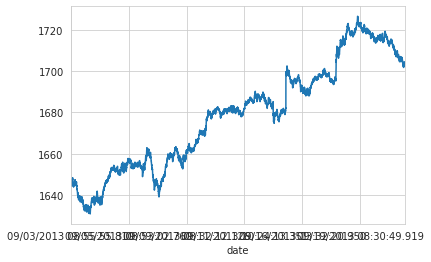

In [0]:
input_data_final = pd.read_csv(file_path+'input_data_final.csv', index_col='date')
y = input_data_final.copy(deep=True)
y['close'].plot()

We want to find the time span of the tick bar to get proper time frame of prediction

In [0]:
temp_datetime = [datetime.strptime(x,  '%m/%d/%Y %H:%M:%S.%f') for x in y.index.values]
t0 = temp_datetime[:-1]
t1 = temp_datetime[1:]
temp_t_df = pd.DataFrame([t1, t0]).T
temp_t_df['diff'] = temp_t_df[0] - temp_t_df[1]
temp_t_df['diff'].describe()

count                      5779
mean     0 days 00:04:17.935358
std      0 days 01:03:53.977942
min      0 days 00:00:00.142000
25%      0 days 00:00:31.708000
50%      0 days 00:01:04.335000
75%      0 days 00:02:11.941000
max      2 days 08:52:43.944000
Name: diff, dtype: object

Average time differece of each tick bars are 4 minutes, min is less than a second and max is more than 2 days. 75% of the data fall within 2 minutes. We want to apply meta-labeling as presented by Marcos de Lopez


In [0]:
#Code for Multiprocessing, Refer to Marcos de Lopez Ch.20
def linParts(numAtoms,numThreads):
    # partition of atoms with a single loop
    parts=np.linspace(0,numAtoms,min(numThreads,numAtoms)+1)
    parts=np.ceil(parts).astype(int)
    return parts

def nestedParts(numAtoms,numThreads,upperTriang=False):
    # partition of atoms with an inner loop
    parts,numThreads_=[0],min(numThreads,numAtoms)
    for num in range(numThreads_):
        part=1+4*(parts[-1]**2+parts[-1]+numAtoms*(numAtoms+1.)/numThreads_)
        part=(-1+part**.5)/2.
        parts.append(part)
    parts=np.round(parts).astype(int)
    if upperTriang: # the first rows are heaviestj
        parts=np.cumsum(np.diff(parts)[::-1])
        parts=np.append(np.array([0]),parts)
    return parts

def mpPandasObj(func,pdObj,numThreads=24,mpBatches=1,linMols=True,**kargs):
    '''
    Parallelize jobs, return a dataframe or series
    + func: function to be parallelized. Returns a DataFrame
    + pdObj[0]: Name of argument used to pass the molecule
    + pdObj[1]: List of atoms that will be grouped into molecules
    + kwds: any other argument needed by func
    
    Example: df1=mpPandasObj(func,('molecule',df0.index),24,**kwds)
    '''
    import pandas as pd
    #if linMols:parts=linParts(len(argList[1]),numThreads*mpBatches)
    #else:parts=nestedParts(len(argList[1]),numThreads*mpBatches)
    if linMols:parts=linParts(len(pdObj[1]),numThreads*mpBatches)
    else:parts=nestedParts(len(pdObj[1]),numThreads*mpBatches)
    
    jobs=[]
    for i in range(1,len(parts)):
      job={pdObj[0]:pdObj[1][parts[i-1]:parts[i]],'func':func}
      job.update(kargs)
      jobs.append(job)
    if numThreads==1: out=processJobs_(jobs)
    else: out=processJobs(jobs,numThreads=numThreads)
    if isinstance(out[0],pd.DataFrame):df0=pd.DataFrame()
    elif isinstance(out[0],pd.Series):df0=pd.Series()
    else:return out
    for i in out:df0=df0.append(i)
    df0=df0.sort_index()
    return df0

def processJobs_(jobs):
    # Run jobs sequentially, for debugging
    out=[]
    for job in jobs:
        out_=expandCall(job)
        out.append(out_)
    return out

import multiprocessing as mp
import datetime as dt

#________________________________
def reportProgress(jobNum,numJobs,time0,task):
    # Report progress as asynch jobs are completed
    msg=[float(jobNum)/numJobs, (time.time()-time0)/60.]
    msg.append(msg[1]*(1/msg[0]-1))
    timeStamp=str(dt.datetime.fromtimestamp(time.time()))
    msg=timeStamp+' '+str(round(msg[0]*100,2))+'% '+task+' done after '+ \
        str(round(msg[1],2))+' minutes. Remaining '+str(round(msg[2],2))+' minutes.'
    if jobNum<numJobs:sys.stderr.write(msg+'\r')
    else:sys.stderr.write(msg+'\n')
    return
#________________________________
def processJobs(jobs,task=None,numThreads=24):
    # Run in parallel.
    # jobs must contain a 'func' callback, for expandCall
    if task is None:task=jobs[0]['func'].__name__
    pool=mp.Pool(processes=numThreads)
    outputs,out,time0=pool.imap_unordered(expandCall,jobs),[],time.time()
    # Process asyn output, report progress
    for i,out_ in enumerate(outputs,1):
        out.append(out_)
        reportProgress(i,len(jobs),time0,task)
    pool.close();pool.join() # this is needed to prevent memory leaks
    return out

def expandCall(kargs):
    # Expand the arguments of a callback function, kargs['func']
    func=kargs['func']
    del kargs['func']
    out=func(**kargs)
    return out

def _pickle_method(method):
    func_name=method.im_func.__name__
    obj=method.im_self
    cls=method.im_class
    return _unpickle_method, (func_name,obj,cls)
#________________________________
def _unpickle_method(func_name,obj,cls):
    for cls in cls.mro():
        try:func=cls.__dict__[func_name]
        except KeyError:pass
        else:break
    return func.__get__(obj,cls)
#________________________________
import copyreg,types, multiprocessing as mp
copyreg.pickle(types.MethodType,_pickle_method,_unpickle_method)

In [0]:
#http://www.blackarbs.com/blog/labeling-and-meta-labeling-returns-for-ml-prediction

#Symmetric CUSUM Filter
def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0, 0
    diff = np.log(gRaw).diff().dropna()
    for i in tqdm(diff.index[1:]):
        try:
            pos, neg = float(sPos+diff.loc[i]), float(sNeg+diff.loc[i])
        except Exception as e:
            print(e)
            print(sPos+diff.loc[i], type(sPos+diff.loc[i]))
            print(sNeg+diff.loc[i], type(sNeg+diff.loc[i]))
            break
        sPos, sNeg=max(0., pos), min(0., neg)
        if sNeg<-h:
            sNeg=0;tEvents.append(i)
        elif sPos>h:
            sPos=0;tEvents.append(i)
    return pd.DatetimeIndex(tEvents)

#Get volatiliity
def getVol(close,span=100, delta = pd.Timedelta(minutes=30)): 
    ##1 minute is 480 ticks
    #daily vol reindexed to close
    df0=close.index.searchsorted(close.index-delta)
    df0=df0[df0>0]   
    df0=(pd.Series(close.index[df0-1], index=close.index[close.shape[0]-df0.shape[0]:]))   
    try:
        df0=close.loc[df0.index]/close.loc[df0.values].values-1 # daily rets
    except Exception as e:
        print(f'error: {e}\nplease confirm no duplicate indices')
    df0=df0.ewm(span=span).std().rename('dailyVol')
    return df0

#Apply triple barrier labeling
def applyPtSlOnT1(close,events,ptSl,molecule):
    # apply stop loss/profit taking, if it takes place before t1 (end of event)
    events_=events.loc[molecule]
    out=events_[['t1']].copy(deep=True)
    if ptSl[0]>0: pt=ptSl[0]*events_['trgt']
    else: pt=pd.Series(index=events.index) # NaNs
    if ptSl[1]>0: sl=-ptSl[1]*events_['trgt']
    else: sl=pd.Series(index=events.index) # NaNs
    for loc,t1 in events_['t1'].fillna(close.index[-1]).iteritems():
        df0=close[loc:t1] # path prices
        df0=(df0/close[loc]-1)*events_.at[loc,'side'] # path returns
        out.loc[loc,'sl']=df0[df0<sl[loc]].index.min() # earliest stop loss
        out.loc[loc,'pt']=df0[df0>pt[loc]].index.min() # earliest profit taking
    return out

#Gettting Time of First Touch (getEvents)
def getEvents(close, tEvents, ptSl, trgt, minRet, numThreads, t1=False, side=None):
    #1) get target
    trgt=trgt.loc[tEvents]
    trgt=trgt[trgt>minRet] # minRet
    #2) get t1 (max holding period)
    if t1 is False: t1=pd.Series(pd.NaT, index=tEvents)
    #3) form events object, apply stop loss on t1
    if side is None: side_, ptSl_=pd.Series(1.,index=trgt.index), [ptSl[0],ptSl[0]]
    else: side_, ptSl_=side.loc[trgt.index],ptSl[:2]
    events=pd.concat({'t1':t1,'trgt':trgt,'side':side_}, axis=1).dropna(subset=['trgt'])
    df0=mpPandasObj(func=applyPtSlOnT1,pdObj=('molecule',events.index), numThreads=numThreads,close=close,events=events, ptSl=ptSl_)
    events['t1']=df0.dropna(how='all').min(axis=1) # pd.min ignores nan
    if side is None:events=events.drop('side',axis=1)
    return events

#Adding Vertical Barrier
def addVerticalBarrier(tEvents, close, numMinutes=30):
    t1=close.index.searchsorted(tEvents+pd.Timedelta(minutes=numMinutes))
    t1=t1[t1<close.shape[0]]
    t1=pd.Series(close.index[t1],index=tEvents[:t1.shape[0]])
    return t1

#Labeling for side and size
def getBinsOld(events,close):
    #1) prices aligned with events
    events_=events.dropna(subset=['t1'])
    px=events_.index.union(events_['t1'].values).drop_duplicates()
    px=close.reindex(px,method='bfill')
    #2) create out object
    out=pd.DataFrame(index=events_.index)
    out['ret']=px.loc[events_['t1'].values].values/px.loc[events_.index]-1
    out['bin']=np.sign(out['ret'])
    #where out index and t1 (vertical barrier) intersect label 0
    try:
        locs = out.query('index in @t1').index
        out.loc[locs, 'bin'] = 0
    except:
        pass
    return out

#Expanding getBins to Incorporate Meta-Labeling [
def getBins(events, close):
    '''
    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:
    -events.index is event's starttime
    -events['t1'] is event's endtime
    -events['trgt'] is event's target
    -events['side'] (optional) implies the algo's position side
    Case 1: ('side' not in events): bin in (-1,1) <-label by price action
    Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    '''
    #1) prices aligned with events
    events_=events.dropna(subset=['t1'])
    px=events_.index.union(events_['t1'].values).drop_duplicates()
    px=close.reindex(px,method='bfill')
    #2) create out object
    out=pd.DataFrame(index=events_.index)
    out['ret']=px.loc[events_['t1'].values].values/px.loc[events_.index]-1
    if 'side' in events_:out['ret']*=events_['side'] # meta-labeling
    out['bin']=np.sign(out['ret'])
    if 'side' in events_:out.loc[out['ret']<=0,'bin']=0 # meta-labeling
    return out

#Dropping Unnecessary Labels
def dropLabels(events, minPct=.05):
    # apply weights, drop labels with insufficient examples
    while True:
        df0=events['bin'].value_counts(normalize=True)
        if df0.min()>minPct or df0.shape[0]<3:break
        print('dropped label: ', df0.argmin(),df0.min())
        events=events[events['bin']!=df0.argmin()]
    return events

In [0]:
temp_datetime = [datetime.strptime(x,  '%m/%d/%Y %H:%M:%S.%f') for x in y.index.values]
close = y['close'].copy()
close.index = temp_datetime
Vol = getVol(close)
print(Vol.to_frame())

                         dailyVol
2013-09-03 09:26:03.377       NaN
2013-09-03 09:26:52.361  0.000107
2013-09-03 09:27:25.606  0.000153
2013-09-03 09:28:22.682  0.000261
2013-09-03 09:29:12.844  0.000457
...                           ...
2013-09-20 14:58:07.381  0.000888
2013-09-20 14:58:30.187  0.000882
2013-09-20 14:59:00.041  0.000881
2013-09-20 14:59:08.571  0.000874
2013-09-20 14:59:24.248  0.000867

[5725 rows x 1 columns]


Average Volatility : 0.0013245434276392446 



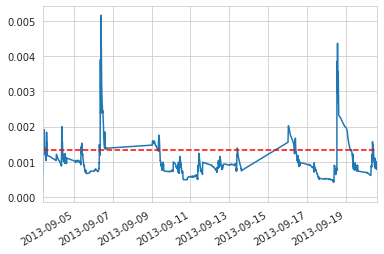

In [0]:
print("Average Volatility :", Vol.mean(), '\n')
f,ax=plt.subplots()
Vol.plot(ax=ax)
ax.axhline(Vol.mean(),ls='--',color='r')

In [0]:
tEvents = getTEvents(close,h=Vol.mean())
tEvents

100%|██████████| 5778/5778 [00:00<00:00, 15295.79it/s]


DatetimeIndex(['2013-09-03 09:01:01.565000', '2013-09-03 09:03:49.829000',
               '2013-09-03 09:10:32.385000', '2013-09-03 09:16:36.539000',
               '2013-09-03 09:23:34.570000', '2013-09-03 09:32:56.206000',
               '2013-09-03 09:57:07.670000', '2013-09-03 10:17:31.294000',
               '2013-09-03 10:22:18.628000', '2013-09-03 10:24:08.923000',
               ...
               '2013-09-20 11:24:06.219000', '2013-09-20 11:46:32.238000',
               '2013-09-20 12:17:30.342000', '2013-09-20 12:42:08.243000',
               '2013-09-20 13:01:56.070000', '2013-09-20 13:26:57.424000',
               '2013-09-20 13:41:06.515000', '2013-09-20 14:23:03.602000',
               '2013-09-20 14:35:06.190000', '2013-09-20 14:40:08.332000'],
              dtype='datetime64[ns]', length=342, freq=None)

In [0]:
t1 = addVerticalBarrier(tEvents, close, numMinutes=30)
t1

2013-09-03 09:01:01.565   2013-09-03 09:31:44.721
2013-09-03 09:03:49.829   2013-09-03 09:33:57.477
2013-09-03 09:10:32.385   2013-09-03 09:40:33.448
2013-09-03 09:16:36.539   2013-09-03 09:47:20.951
2013-09-03 09:23:34.570   2013-09-03 09:53:47.643
                                    ...          
2013-09-20 12:42:08.243   2013-09-20 13:13:11.002
2013-09-20 13:01:56.070   2013-09-20 13:31:58.087
2013-09-20 13:26:57.424   2013-09-20 13:58:21.229
2013-09-20 13:41:06.515   2013-09-20 14:11:31.315
2013-09-20 14:23:03.602   2013-09-20 14:53:26.448
Length: 340, dtype: datetime64[ns]

In [0]:
# create target series
ptsl = [1,1]
target = Vol
# select minRet
minRet = 0.0
cpus = 1

events = getEvents(close,tEvents,ptsl,target,minRet,cpus,t1=t1)
print(events)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


                                                   t1      trgt
2013-09-03 09:32:56.206 2013-09-03 10:03:17.964000000  0.000954
2013-09-03 09:57:07.670 2013-09-03 10:03:17.964000000  0.000795
2013-09-03 10:17:31.294 2013-09-03 10:20:00.415000064  0.000772
2013-09-03 10:22:18.628 2013-09-03 10:23:39.953999872  0.001086
2013-09-03 10:24:08.923 2013-09-03 10:29:41.544000000  0.001275
...                                               ...       ...
2013-09-20 13:26:57.424 2013-09-20 13:37:38.240000000  0.000805
2013-09-20 13:41:06.515 2013-09-20 13:56:56.259000064  0.000885
2013-09-20 14:23:03.602 2013-09-20 14:29:49.435000064  0.000786
2013-09-20 14:35:06.190 2013-09-20 14:37:45.921999872  0.000993
2013-09-20 14:40:08.332 2013-09-20 14:47:16.420999936  0.000988

[337 rows x 2 columns]


In [0]:
labels = getBins(events, close)
print(labels)
print(labels.bin.value_counts())

                              ret  bin
2013-09-03 09:32:56.206  0.000000  0.0
2013-09-03 09:57:07.670  0.000912  1.0
2013-09-03 10:17:31.294 -0.000912 -1.0
2013-09-03 10:22:18.628 -0.001218 -1.0
2013-09-03 10:24:08.923 -0.001372 -1.0
...                           ...  ...
2013-09-20 13:26:57.424 -0.000879 -1.0
2013-09-20 13:41:06.515  0.001173  1.0
2013-09-20 14:23:03.602 -0.001174 -1.0
2013-09-20 14:35:06.190  0.001175  1.0
2013-09-20 14:40:08.332 -0.001027 -1.0

[337 rows x 2 columns]
 1.0    176
-1.0    144
 0.0     17
Name: bin, dtype: int64


In [0]:
clean_labels = dropLabels(labels)
clean_labels = clean_labels[clean_labels['bin']!=0]
print(clean_labels)
print(clean_labels.bin.value_counts())
#clean_labels.to_csv(file_path+'meta_label_data.csv')

                              ret  bin
2013-09-03 09:57:07.670  0.000912  1.0
2013-09-03 10:17:31.294 -0.000912 -1.0
2013-09-03 10:22:18.628 -0.001218 -1.0
2013-09-03 10:24:08.923 -0.001372 -1.0
2013-09-03 10:27:37.089 -0.000763 -1.0
...                           ...  ...
2013-09-20 13:26:57.424 -0.000879 -1.0
2013-09-20 13:41:06.515  0.001173  1.0
2013-09-20 14:23:03.602 -0.001174 -1.0
2013-09-20 14:35:06.190  0.001175  1.0
2013-09-20 14:40:08.332 -0.001027 -1.0

[320 rows x 2 columns]
 1.0    176
-1.0    144
Name: bin, dtype: int64


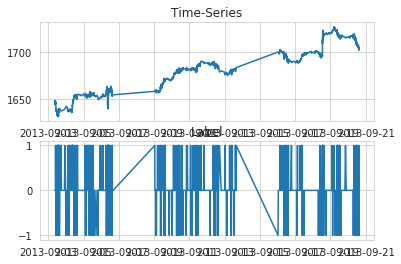

In [0]:
plot_temp = pd.merge(y['close'], clean_labels['bin'], how='outer', left_index =True, right_index=True)
plot_temp = plot_temp.fillna(0)
fig, ax = plt.subplots(2, 1)
ax[0].plot(plot_temp['close'])
ax[0].set_title('Time-Series')
ax[1].plot(plot_temp['bin'])
ax[1].set_title('Label')
plt.show()

In [0]:
input_data_final = pd.read_csv(file_path+'input_data_final.csv', index_col='date')
temp_datetime_d = [datetime.strptime(x,  '%m/%d/%Y %H:%M:%S.%f') for x in input_data_final.index.values]
input_data_final.index = temp_datetime_d 
input_data_label = pd.read_csv(file_path+'meta_label_data.csv')
input_data_label = input_data_label.rename(columns={'Unnamed: 0' : 'date'})
input_data_label = input_data_label.set_index('date')
input_data_label = pd.DataFrame(input_data_label['bin'])
temp_datetime_l = [datetime.strptime(x,  '%Y-%m-%d %H:%M:%S.%f') for x in input_data_label.index.values]
input_data_label.index = temp_datetime_l

print(len(input_data_final))
print(len(input_data_label))

input_data = pd.merge(input_data_final,input_data_label, how='outer', left_index=True, right_index=True)
input_data = input_data.rename(columns={'bin' : 'label'})
print(len(input_data))

input_data.head()

5780
320
5780


,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32,frac_diff_ret,close,label
2013-09-03 08:55:55.810,-37.500000,2.238810,2.251383,2.291642,2.278495,2.239178,0.000911,0.000000,0.000759,93.822122,48.275862,83.333333,33.333333,21.481481,0.000304,0.000000,-0.000455,-0.000758,3.445364,1647.50,NaN
2013-09-03 08:57:26.044,-25.000000,2.244095,1.755672,2.289450,2.275912,2.245363,0.000303,0.000000,0.000152,94.967898,46.428571,85.714286,56.349206,33.968254,0.000455,0.000152,0.000000,-0.000910,2.591709,1647.75,NaN
2013-09-03 08:58:40.505,-100.000000,2.122186,1.957949,2.224594,2.274041,3.248533,0.000000,-0.001062,-0.001062,6.163892,39.393939,0.000000,56.349206,48.677249,-0.000304,-0.000607,-0.001062,-0.001668,0.570283,1646.00,NaN
2013-09-03 08:59:18.493,-88.888889,2.111784,2.081865,2.216356,2.397596,3.100422,0.000152,-0.000152,0.000152,94.955308,41.176471,22.222222,35.978836,49.559083,0.000000,-0.000607,-0.000759,-0.001365,2.369323,1646.25,NaN
2013-09-03 09:00:11.487,-42.857143,2.231451,2.214820,2.273751,2.408932,2.131648,0.000456,0.000000,0.000456,94.919444,47.222222,55.555556,25.925926,39.417989,-0.000303,0.000000,-0.000152,-0.000910,2.962141,1647.00,NaN


In [0]:
input_data = pd.merge(input_data_final,input_data_label, how='inner', left_index=True, right_index=True)
input_data = input_data.rename(columns={'bin' : 'label'})
print(len(input_data))

input_data.head()

320


,william_r,kenkansen,kijunsen,leading_span_a,leading_span_b,lagging_span,h_o,l_o,c_o,money_flow,rsi,stochastic_k,stochastic_d,stochastic_d_slow,trend_4,trend_8,trend_16,trend_32,frac_diff_ret,close,label
2013-09-03 09:57:07.670,-100.0,1.984414,2.269637,2.245557,2.254632,1.972779,0.000000,-0.000759,-0.000759,6.814684,41.379310,0.000000,31.666667,31.666667,-0.000608,-0.001366,-0.001063,-0.000304,1.028589,1644.75,1.0
2013-09-03 10:17:31.294,-100.0,2.123561,2.108791,2.346680,2.256834,1.899020,0.000152,-0.000152,-0.000152,5.870390,41.666667,0.000000,0.000000,28.769841,-0.001367,-0.000456,-0.000456,-0.001215,1.885712,1644.25,-1.0
2013-09-03 10:22:18.628,-100.0,2.204828,2.231385,2.244153,1.994853,2.662770,0.000304,-0.000152,-0.000152,50.000000,32.432432,0.000000,17.777778,19.740260,-0.000152,-0.001064,-0.001823,-0.001823,1.944563,1642.50,-1.0
2013-09-03 10:24:08.923,-100.0,2.161868,2.196684,2.253314,2.248485,1.759148,0.000000,-0.000457,-0.000457,7.560414,14.285714,0.000000,12.500000,10.802469,-0.000761,-0.001522,-0.002736,-0.002888,1.448604,1640.25,-1.0
2013-09-03 10:27:37.089,-100.0,1.685481,1.686551,2.111546,2.266360,2.484724,0.000000,-0.000610,-0.000457,7.633176,23.333333,8.333333,2.777778,3.703704,-0.001219,-0.001219,-0.001979,-0.004556,1.401195,1638.75,-1.0


Modeling

In [0]:
#Train Data, Test Data
X = input_data.iloc[:, :-2].values
y = input_data.iloc[:, -1].values

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, input_data.index, test_size=0.3, shuffle=False)

train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
X_train, X_test = (X_train-train_mean)/train_std, (X_test-train_mean)/train_std
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(224, 19)
(96, 19)
(224,)
(96,)


In [0]:
#train
#random forest
n_estimator = 5000
rf = RandomForestClassifier(max_depth=10, n_estimators=n_estimator,criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#svm
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

              precision    recall  f1-score   support

        -1.0       0.52      0.33      0.40        46
         1.0       0.54      0.72      0.62        50

    accuracy                           0.53        96
   macro avg       0.53      0.52      0.51        96
weighted avg       0.53      0.53      0.51        96



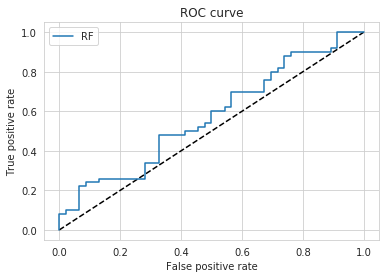

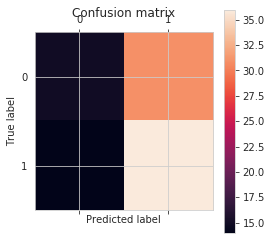

In [0]:
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf_ = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf_)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf_))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.matshow(cm_rf)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        46
         1.0       0.51      0.96      0.67        50

    accuracy                           0.50        96
   macro avg       0.26      0.48      0.33        96
weighted avg       0.27      0.50      0.35        96



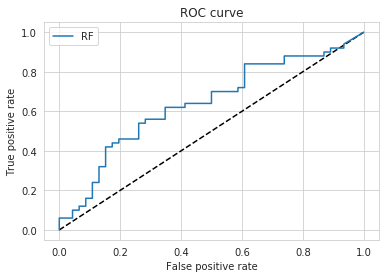

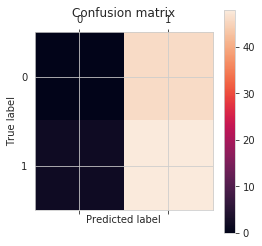

In [0]:
y_pred_svm = svm.predict_proba(X_test)[:, 1]
y_pred_svm_ = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm_)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm_))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.matshow(cm_svm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


We can see from above that we can use random forest model but not SVM since SVM is predicting only 1s. Therefore according to above result, we devise a simple trading strategy only with random forest model as follows:


In [0]:
#signal
signal = pd.DataFrame({'date' : idx_test, 'signal':y_pred_rf_})
signal = signal.set_index('date')
signal

,signal
date,
2013-09-16 07:35:23.098,-1.0
2013-09-16 08:30:47.040,1.0
2013-09-16 08:33:37.139,-1.0
2013-09-16 08:40:53.396,1.0
2013-09-16 09:02:56.217,1.0
...,...
2013-09-20 13:26:57.424,1.0
2013-09-20 13:41:06.515,1.0
2013-09-20 14:23:03.602,1.0


In [0]:
start = signal.index[0]
end = signal.index[-1]

price = pd.DataFrame(input_data_final.loc[start:end]['close'])
price

,close
2013-09-16 07:35:23.098,1698.25
2013-09-16 07:41:24.279,1698.50
2013-09-16 07:45:32.172,1698.00
2013-09-16 07:48:55.919,1697.75
2013-09-16 07:54:10.950,1698.25
...,...
2013-09-20 14:37:10.191,1703.25
2013-09-20 14:37:45.922,1703.75
2013-09-20 14:38:33.683,1703.75
2013-09-20 14:39:31.521,1703.50


In [0]:
series = pd.merge(price, signal, how='outer', left_index=True, right_index=True)
series = series.fillna(0)
series = series[16:] #start with long signal first
series.head(20)

,close,signal
2013-09-16 08:30:47.040,1700.25,1.0
2013-09-16 08:31:19.523,1699.50,0.0
2013-09-16 08:31:30.648,1699.25,0.0
2013-09-16 08:31:49.364,1699.25,0.0
2013-09-16 08:32:14.432,1698.50,0.0
2013-09-16 08:32:37.305,1698.25,0.0
2013-09-16 08:33:06.264,1698.00,0.0
2013-09-16 08:33:37.139,1697.75,-1.0
2013-09-16 08:33:56.746,1697.75,0.0
2013-09-16 08:34:29.342,1697.50,0.0


In [0]:
#!pip install pyfolio
#import pyfolio as pf

flag = 'no_position'
series['long_only'] = 1
series['strategy'] = 0
for i in range(len(series)):
  if flag =='no_position' and series.iloc[i,1]==1:
    series.iloc[i, 3] = 1
    flag = 'long'
  elif flag =='no_position' and series.iloc[i,1]==-1:
    series.iloc[i, 3] = 0
    flag = 'no_position'
  elif flag =='no_position' and series.iloc[i,1]==0:
    series.iloc[i, 3] = 0
    flag = 'no_position'
  elif flag =='long' and series.iloc[i,1]==1:
    series.iloc[i, 3] = 1
    flag = 'long'
  elif flag =='long' and series.iloc[i,1]==-1:
    series.iloc[i, 3] = 0
    flag = 'no_position'
  elif flag =='long' and series.iloc[i,1]==0:
    series.iloc[i, 3] = 1
    flag = 'long'

se2ries.to_csv(file_path+'stock_traded.csv')
series.head(20)


,close,signal,long_only,strategy
2013-09-16 08:30:47.040,1700.25,1.0,1,1
2013-09-16 08:31:19.523,1699.50,0.0,1,1
2013-09-16 08:31:30.648,1699.25,0.0,1,1
2013-09-16 08:31:49.364,1699.25,0.0,1,1
2013-09-16 08:32:14.432,1698.50,0.0,1,1
2013-09-16 08:32:37.305,1698.25,0.0,1,1
2013-09-16 08:33:06.264,1698.00,0.0,1,1
2013-09-16 08:33:37.139,1697.75,-1.0,1,0
2013-09-16 08:33:56.746,1697.75,0.0,1,0
2013-09-16 08:34:29.342,1697.50,0.0,1,0


In [0]:
series['rets'] = series['close']/series['close'].shift(1)-1
series['rets_long_only'] = series['rets']*series['long_only'].shift(1)
series['rets_strategy'] = series['rets']*series['strategy'].shift(1)
series = series.dropna()
series.head(20)

,close,signal,long_only,strategy,rets,rets_long_only,rets_strategy
2013-09-16 08:31:19.523,1699.50,0.0,1,1,-0.000441,-0.000441,-0.000441
2013-09-16 08:31:30.648,1699.25,0.0,1,1,-0.000147,-0.000147,-0.000147
2013-09-16 08:31:49.364,1699.25,0.0,1,1,0.000000,0.000000,0.000000
2013-09-16 08:32:14.432,1698.50,0.0,1,1,-0.000441,-0.000441,-0.000441
2013-09-16 08:32:37.305,1698.25,0.0,1,1,-0.000147,-0.000147,-0.000147
2013-09-16 08:33:06.264,1698.00,0.0,1,1,-0.000147,-0.000147,-0.000147
2013-09-16 08:33:37.139,1697.75,-1.0,1,0,-0.000147,-0.000147,-0.000147
2013-09-16 08:33:56.746,1697.75,0.0,1,0,0.000000,0.000000,0.000000
2013-09-16 08:34:29.342,1697.50,0.0,1,0,-0.000147,-0.000147,-0.000000
2013-09-16 08:35:12.399,1697.50,0.0,1,0,0.000000,0.000000,0.000000


Start date,2013-09-16
End date,2013-09-20
Total months,94
,Backtest
Annual return,0.0%
Cumulative returns,0.4%
Annual volatility,0.4%
Sharpe ratio,0.13
Calmar ratio,0.04
Stability,0.57
Max drawdown,-1.1%


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1.07,2013-09-19,2013-09-20,NaT,NaN
1,0.71,2013-09-16,2013-09-16,2013-09-17,2
2,0.34,2013-09-18,2013-09-18,2013-09-18,1
3,0.32,2013-09-18,2013-09-18,2013-09-18,1
4,0.26,2013-09-18,2013-09-18,2013-09-18,1


Stress Events,mean,min,max
New Normal,0.00%,-0.10%,0.25%


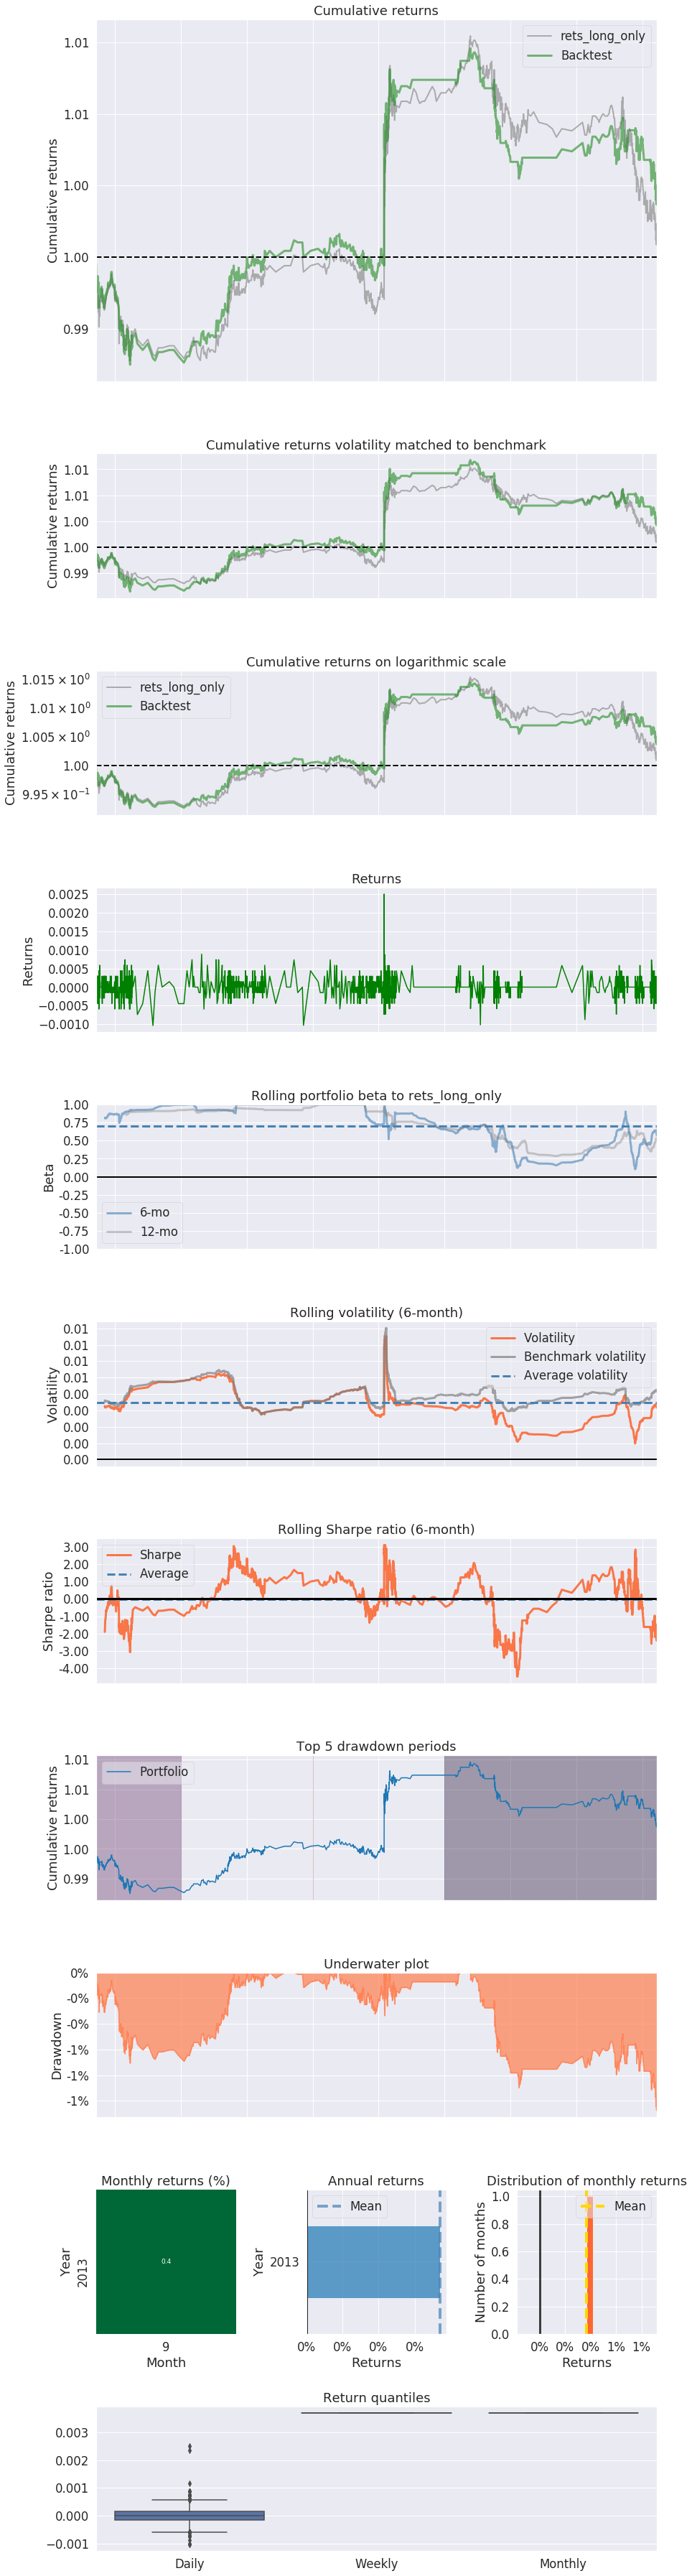

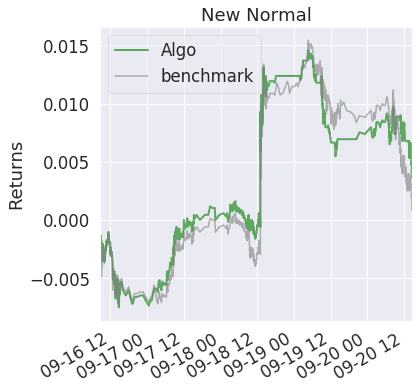

In [0]:
#long only portfolio
#pf.create_returns_tear_sheet(series['rets_long_only'], live_start_date=series.index[0])  
pf.create_full_tear_sheet(series['rets_strategy'], benchmark_rets=series['rets_long_only'])  

We use another trend following strategy. We inverse the william_r signal(which is supposed to be used as mean-reversion signal) and combined with moving average signal(long when ma_8>ma_32) in order to remove noises and reduce trading frequencies. We do not take into account the trading cost. We understand that it may severely deteriorate the return of the strategy.

In [0]:
new_series = input_data_final[['william_r', 'close']]
new_series['ma_8'] = new_series['close'].rolling(8).mean()
new_series['ma_32'] = new_series['close'].rolling(32).mean()
new_series = new_series.dropna()
new_series.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,william_r,close,ma_8,ma_32
2013-09-03 09:11:23.008,-25.000000,1647.25,1646.90625,1646.445312
2013-09-03 09:12:00.360,-20.000000,1647.50,1647.06250,1646.445312
2013-09-03 09:12:37.018,-0.000000,1648.25,1647.31250,1646.460938
2013-09-03 09:13:07.236,-0.000000,1648.50,1647.59375,1646.539062
2013-09-03 09:13:27.911,-9.090909,1648.25,1647.84375,1646.601562
2013-09-03 09:14:00.545,-36.363636,1647.50,1647.87500,1646.617188
2013-09-03 09:14:48.225,-36.363636,1647.50,1647.81250,1646.625000
2013-09-03 09:15:40.956,-54.545455,1647.00,1647.71875,1646.640625
2013-09-03 09:16:13.682,-77.777778,1646.75,1647.65625,1646.687500
2013-09-03 09:16:36.539,-100.000000,1646.00,1647.46875,1646.703125


In [0]:
new_series['reverse_will_r_strategy_'] = [-1 if x < -80 else 1 if x > -20 else 0 for x in new_series['william_r']]
new_series['mom_strategy_'] = (new_series['ma_8'] > new_series['ma_32'])*1
new_series['combined_strategy_'] = (new_series['reverse_will_r_strategy_']==new_series['mom_strategy_'])*1

new_series['combined_strategy'] = 0
for i in range(1, len(new_series)):
  if new_series['combined_strategy_'][i-1] == 0 and new_series['combined_strategy_'][i] == 1:
    new_series['combined_strategy'][i] = 0
  else:
    new_series['combined_strategy'][i] = new_series['combined_strategy_'][i]

new_series['rets'] = new_series['close']/new_series['close'].shift(1)-1
new_series['long_only'] = 1
new_series['rets_long_only'] = new_series['rets']*new_series['long_only'].shift(0)
new_series['rets_combined_strategy'] = new_series['rets']*new_series['combined_strategy'].shift(0) 
#we assume in our trading rule that, since the previous bar's close is current bar's open, we trade with no lag, although it may not be realistic and subject to slippage.

new_series = new_series.dropna()
new_series.to_csv(file_path+'trading_rule.csv')
new_series.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,william_r,close,ma_8,ma_32,reverse_will_r_strategy_,mom_strategy_,combined_strategy_,combined_strategy,rets,long_only,rets_long_only,rets_combined_strategy
2013-09-03 09:12:37.018,-0.000000,1648.25,1647.31250,1646.460938,1,1,1,0,0.000455,1,0.000455,0.000000
2013-09-03 09:13:07.236,-0.000000,1648.50,1647.59375,1646.539062,1,1,1,1,0.000152,1,0.000152,0.000152
2013-09-03 09:13:27.911,-9.090909,1648.25,1647.84375,1646.601562,1,1,1,1,-0.000152,1,-0.000152,-0.000152
2013-09-03 09:14:00.545,-36.363636,1647.50,1647.87500,1646.617188,0,1,0,0,-0.000455,1,-0.000455,-0.000000
2013-09-03 09:14:48.225,-36.363636,1647.50,1647.81250,1646.625000,0,1,0,0,0.000000,1,0.000000,0.000000
2013-09-03 09:15:40.956,-54.545455,1647.00,1647.71875,1646.640625,0,1,0,0,-0.000303,1,-0.000303,-0.000000
2013-09-03 09:16:13.682,-77.777778,1646.75,1647.65625,1646.687500,0,1,0,0,-0.000152,1,-0.000152,-0.000000
2013-09-03 09:16:36.539,-100.000000,1646.00,1647.46875,1646.703125,-1,1,0,0,-0.000455,1,-0.000455,-0.000000
2013-09-03 09:17:16.204,-100.000000,1645.75,1647.15625,1646.710938,-1,1,0,0,-0.000152,1,-0.000152,-0.000000
2013-09-03 09:17:44.117,-81.818182,1646.25,1646.87500,1646.726562,-1,1,0,0,0.000304,1,0.000304,0.000000


Start date,2013-09-03
End date,2013-09-20
Total months,273
,Backtest
Annual return,0.7%
Cumulative returns,16.9%
Annual volatility,0.3%
Sharpe ratio,2.18
Calmar ratio,4.64
Stability,0.99
Max drawdown,-0.1%


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.15,2013-09-17,2013-09-17,2013-09-17,1
1,0.15,2013-09-18,2013-09-18,2013-09-18,1
2,0.12,2013-09-16,2013-09-16,2013-09-16,1
3,0.12,2013-09-18,2013-09-18,2013-09-18,1
4,0.12,2013-09-19,2013-09-19,2013-09-19,1


Stress Events,mean,min,max
New Normal,0.00%,-0.09%,0.98%


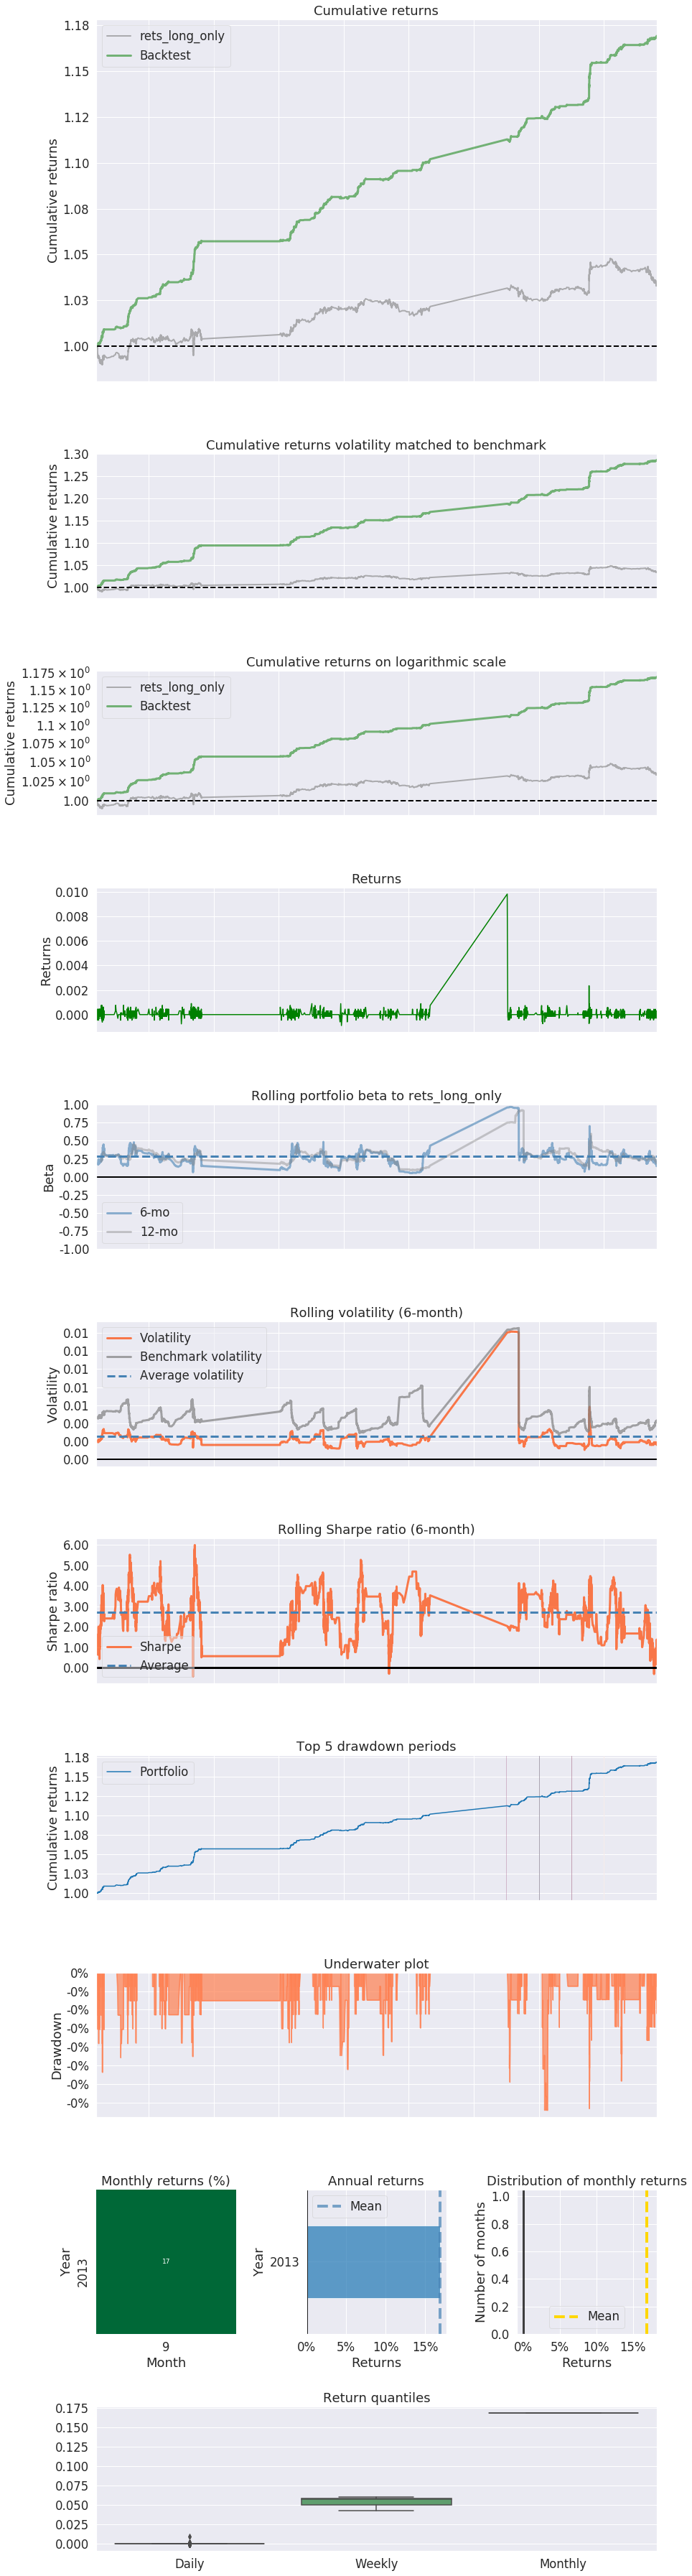

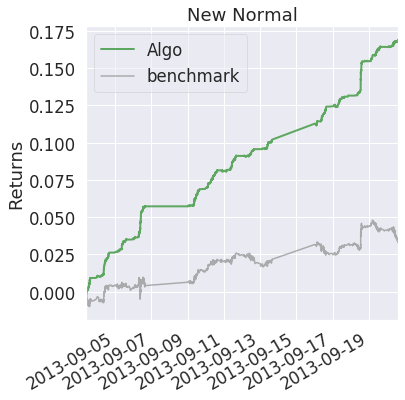

In [0]:
pf.create_full_tear_sheet(new_series['rets_combined_strategy'], benchmark_rets=new_series['rets_long_only'])